**Vérification version de keras**

In [22]:
#!git clone https://github.com/Didier06/IA_FABLAB


In [23]:
import keras
keras.__version__

'2.14.0'

# Un premier réseau de convolution avec Keras

On utilise les couches `Conv2D` et `MaxPooling2D`. 

Remarque imortante : le tenseur d'entrée du réseau de convolution avec keras doit avoir les dimensions suivantes : `(hauteur image, largeur  image, canal de l'image)` 
Dans notre cas : `(28, 28, 1)`, format des images MNIST.  
Pour réaliser cette opération exécuter cette commande :  
`input_shape=(28, 28, 1)`.

In [24]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Affichons la structure du réseau : 

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

Les sorties des couches `Conv2D` et `MaxPooling2D` sont des tenseurs 3D avec les dimensions `(hauteur, largeur, canaux)`.
Le nombre de canaux est fixé par le 1er argument des couches  `Conv2D` (32 ou 64).

Dans l'étape suivante on aplati (Flatten) la couche 3D en une couche 1D puis on retrouve 2 couches "dense".
Avec pour la dernière une activaztion 'softmax'


In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Nous avons réalisé une classification avec 10 sorties.  
Voici le modèle complet avec 93332 paramètres : 

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

Le tenseur `(3, 3, 64)` est transformé en tenseur 1D de dimension `(576,)`, avant la classification avec les 2 couches 'Dense'  

Entrainons le réseau de convolution : 

In [28]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [29]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 14s 14ms/step - loss: 0.1749 - accuracy: 0.9449
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0481 - accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0331 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0198 - accuracy: 0.9941


Evaluons le modèle sur les données de test :

In [ ]:
model.save('model/modelcnn.keras')

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 0.0273 - accuracy: 0.9906


In [31]:
test_acc

0.9905999898910522

Le résultat est très satisfaisant .... est meilleur que celui obtenu avec le réseau dense.

**Prédictions avec une image dessinée sur paint.**

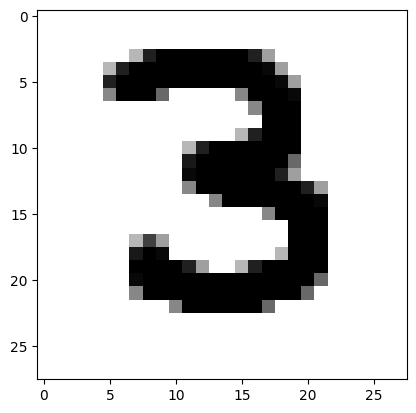

In [32]:
# reading png image file 
import matplotlib.pyplot as plt 
import matplotlib.image as img 
im = img.imread('images/digit_3.png')
plt.imshow(im, cmap=plt.cm.binary)
#print(im.shape)
#print(img.shape)

**Préparation de l'image dessinée et prédiction**

In [33]:
from PIL import Image, ImageOps
import numpy as np
def preprocess_image(image_path):# préparation de l'image
    img = Image.open(image_path).convert('L')  # Convertir en niveau de gris grayscale
    img = ImageOps.invert(img)                 # inverse l'image pour qu'elle soit conforme aux images MNIST
    img = img.resize((28, 28))                 # Redimensionnement à 28x28
    img = np.array(img)                        # Convertir en tableau numpy
    img = img / 255.0                          # on normalise les valeurs des pixels
    img = img.reshape(1,28,28)                 # redimensionne en  (28,28) ( entrée du réseau cnn
    return img

processed_image = preprocess_image('images/digit_3.png') 
    
predictions= model.predict(processed_image)# prévision 

print(predictions.round(2)) # résultat
print("Chiffre prédit : ", predictions.argmax())# index  of the class with highest probability
          

1/1 [==============================] - 0s 93ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Chiffre prédit :  3
